# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | korkuteli
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | gadzhiyevo
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | sandnessjoen
Processing Record 9 of Set 1 | san patricio
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | trondheim
Processing Record 12 of Set 1 | kuanda
Processing Record 13 of Set 1 | island harbour
Processing Record 14 of Set 1 | porto novo
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | mitu
Processing Record 17 of Set 1 | manakara
Processing Record 18 of Set 1 | revda
Processing Record 19 of Set 1 | dudinka
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | port elizabeth
Processing

Processing Record 37 of Set 4 | alofi
Processing Record 38 of Set 4 | munsan
Processing Record 39 of Set 4 | ancud
Processing Record 40 of Set 4 | geraldton
Processing Record 41 of Set 4 | talitsa
Processing Record 42 of Set 4 | chonchi
Processing Record 43 of Set 4 | milford haven
Processing Record 44 of Set 4 | port-vila
Processing Record 45 of Set 4 | fuvahmulah
City not found. Skipping...
Processing Record 46 of Set 4 | okahao
Processing Record 47 of Set 4 | cidreira
Processing Record 48 of Set 4 | mandalgovi
Processing Record 49 of Set 4 | makoua
Processing Record 0 of Set 5 | tarnogskiy gorodok
Processing Record 1 of Set 5 | sinabang
Processing Record 2 of Set 5 | posse
Processing Record 3 of Set 5 | pamanukan
Processing Record 4 of Set 5 | longyearbyen
Processing Record 5 of Set 5 | san juan del sur
Processing Record 6 of Set 5 | kalmunai
Processing Record 7 of Set 5 | west island
Processing Record 8 of Set 5 | puerto santa
Processing Record 9 of Set 5 | seogwipo
City not found.

Processing Record 28 of Set 8 | shagonar
Processing Record 29 of Set 8 | miyanoura
City not found. Skipping...
Processing Record 30 of Set 8 | bodo
Processing Record 31 of Set 8 | mugia
Processing Record 32 of Set 8 | swakopmund
Processing Record 33 of Set 8 | brokopondo
Processing Record 34 of Set 8 | al jawf
Processing Record 35 of Set 8 | shitanjing
Processing Record 36 of Set 8 | wewak
Processing Record 37 of Set 8 | taulaga
Processing Record 38 of Set 8 | gaoual
Processing Record 39 of Set 8 | bardai
Processing Record 40 of Set 8 | naze
Processing Record 41 of Set 8 | toga village
City not found. Skipping...
Processing Record 42 of Set 8 | darwin
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | borba
Processing Record 45 of Set 8 | duragan
Processing Record 46 of Set 8 | severobaykal'sk
Processing Record 47 of Set 8 | tqvarch'eli
Processing Record 48 of Set 8 | tabou
Processing Record 49 of Set 8 | turpan
Processing Record 0 of Set 9 | akjoujt
Processing Re

Processing Record 16 of Set 12 | cidade velha
Processing Record 17 of Set 12 | ebon
Processing Record 18 of Set 12 | mbandaka
Processing Record 19 of Set 12 | forster
Processing Record 20 of Set 12 | bhimunipatnam
Processing Record 21 of Set 12 | hashtpar
Processing Record 22 of Set 12 | terekeka
City not found. Skipping...
Processing Record 23 of Set 12 | korla
Processing Record 24 of Set 12 | iquique
Processing Record 25 of Set 12 | lhokseumawe
Processing Record 26 of Set 12 | sitka
Processing Record 27 of Set 12 | ouarzazat
Processing Record 28 of Set 12 | gazli
Processing Record 29 of Set 12 | isla vista
Processing Record 30 of Set 12 | inarajan village
Processing Record 31 of Set 12 | piti village
Processing Record 32 of Set 12 | callaway
Processing Record 33 of Set 12 | namtsy
Processing Record 34 of Set 12 | togur
Processing Record 35 of Set 12 | sarupathar
Processing Record 36 of Set 12 | fort bragg
Processing Record 37 of Set 12 | okha
Processing Record 38 of Set 12 | al fallu

In [5]:
#url = "https://api.openweathermap.org/data/2.5/weather?" 
#city_url = url + "appid=" + weather_api_key + "&q=" + city
#print(city_url)
#response = requests.get(city_url)
#city_json = response.json()
#city_json

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,korkuteli,37.0650,30.1957,286.18,56,76,2.42,TR,1683468486
1,olonkinbyen,70.9221,-8.7187,273.75,99,100,6.14,SJ,1683468486
2,stanley,54.8680,-1.6985,291.22,79,20,3.09,GB,1683468486
3,gadzhiyevo,69.2551,33.3362,275.43,94,98,5.02,RU,1683468487
4,grytviken,-54.2811,-36.5092,273.28,86,53,6.60,GS,1683468487


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,korkuteli,37.0650,30.1957,286.18,56,76,2.42,TR,1683468486
1,olonkinbyen,70.9221,-8.7187,273.75,99,100,6.14,SJ,1683468486
2,stanley,54.8680,-1.6985,291.22,79,20,3.09,GB,1683468486
3,gadzhiyevo,69.2551,33.3362,275.43,94,98,5.02,RU,1683468487
4,grytviken,-54.2811,-36.5092,273.28,86,53,6.60,GS,1683468487


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

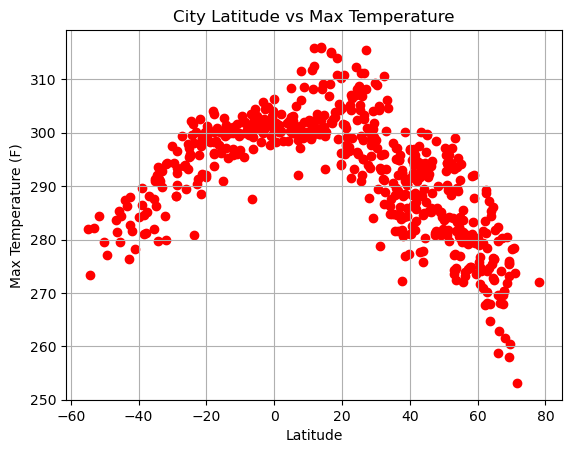

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = 'o', color = 'red', label = 'cities')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

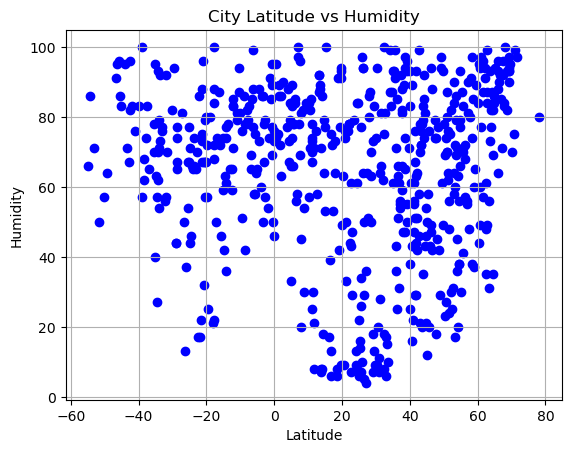

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = 'o', color = 'blue', label = 'cities')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

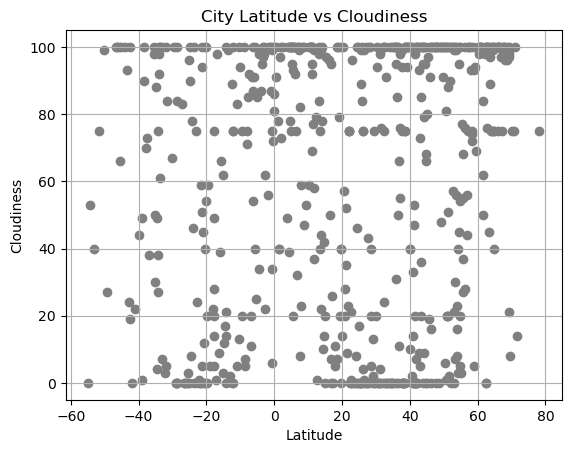

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = 'o', color = 'gray', label = 'cities')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

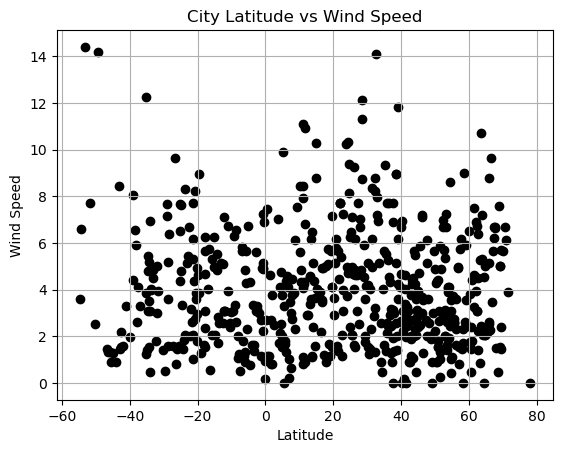

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = 'o', color = 'black', label = 'cities')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,position):
    
    # Run regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    if rvalue >0.50:
        plt.annotate(line_eq, position, color = 'red', fontsize = 10)
    plt.show()

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]


# Display sample data
north_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,korkuteli,37.0650,30.1957,286.18,56,76,2.42,TR,1683468486
1,olonkinbyen,70.9221,-8.7187,273.75,99,100,6.14,SJ,1683468486
2,stanley,54.8680,-1.6985,291.22,79,20,3.09,GB,1683468486
3,gadzhiyevo,69.2551,33.3362,275.43,94,98,5.02,RU,1683468487
6,sandnessjoen,66.0217,12.6316,282.44,64,75,5.14,NO,1683468488


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
south_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,grytviken,-54.2811,-36.5092,273.28,86,53,6.60,GS,1683468487
5,edinburgh of the seven seas,-37.0676,-12.3116,288.11,65,38,3.28,SH,1683468487
8,port-aux-francais,-49.3500,70.2167,277.01,64,27,14.18,TF,1683468489
13,adamstown,-25.0660,-130.1015,295.45,67,96,7.66,PN,1683468490
15,manakara,-22.1333,48.0167,295.80,86,1,1.99,MG,1683468491


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8052974343183648


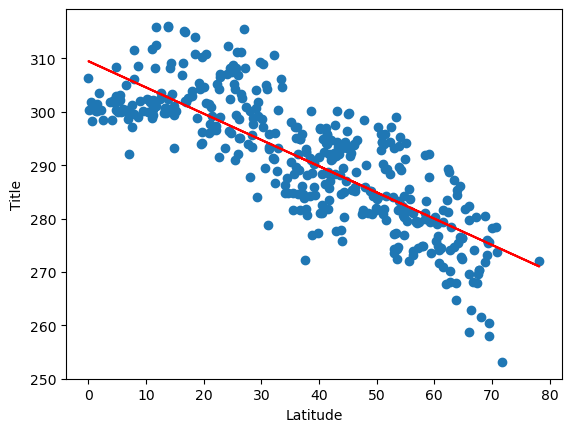

In [49]:
# Linear regression on Northern Hemisphere
x_values = north_hemi_df ["Lat"]
y_values = north_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp',(6,30))


The r-squared is: 0.8420387243548765


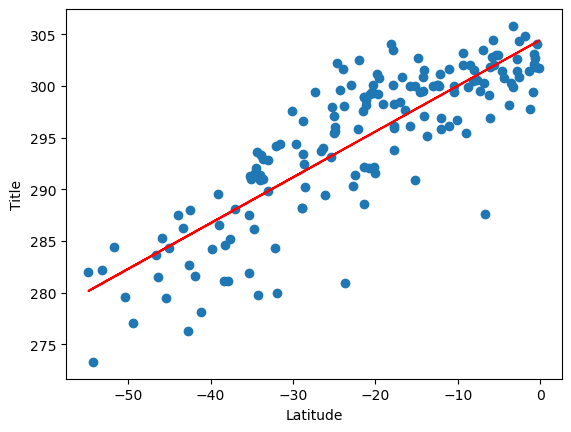

In [51]:
# Linear regression on Southern Hemisphere
x_values = south_hemi_df ["Lat"]
y_values = south_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp',(6,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.14501649628609486


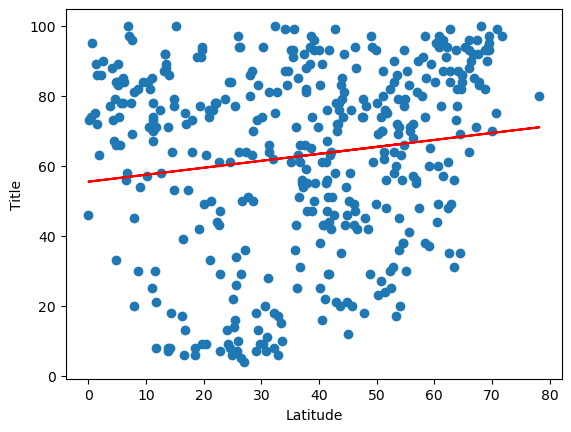

In [21]:
# Northern Hemisphere
x_values = north_hemi_df ["Lat"]
y_values = north_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity')

The r-squared is: -0.0022973849762398394


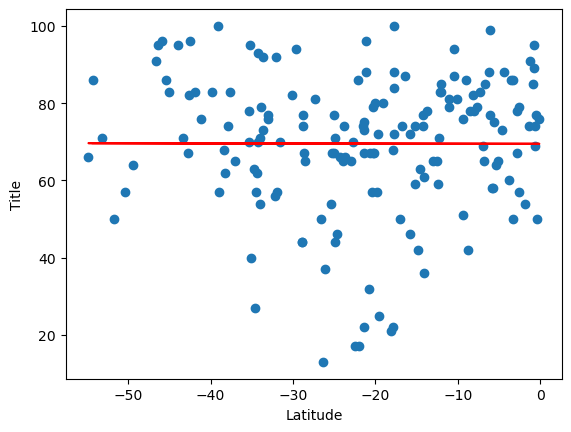

In [22]:
# Southern Hemisphere
x_values = south_hemi_df ["Lat"]
y_values = south_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.09235068561612343


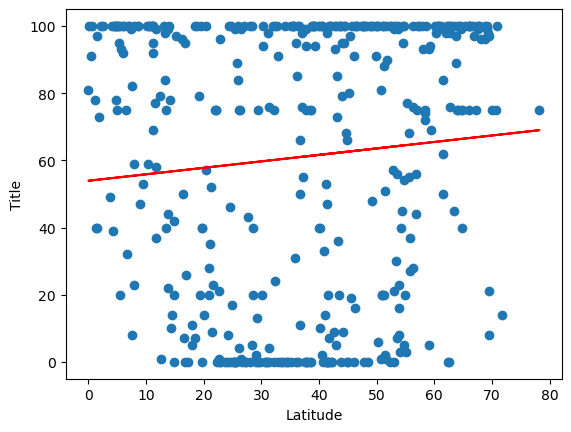

In [23]:
# Northern Hemisphere
x_values = north_hemi_df ["Lat"]
y_values = north_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness')

The r-squared is: 0.05176744399725223


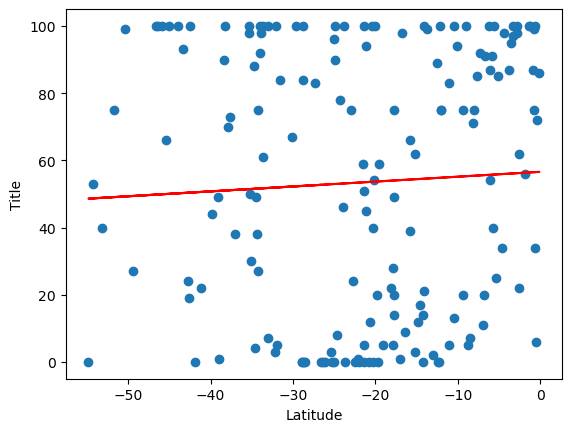

In [24]:
# Southern Hemisphere
x_values = south_hemi_df ["Lat"]
y_values = south_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.057345948125590906


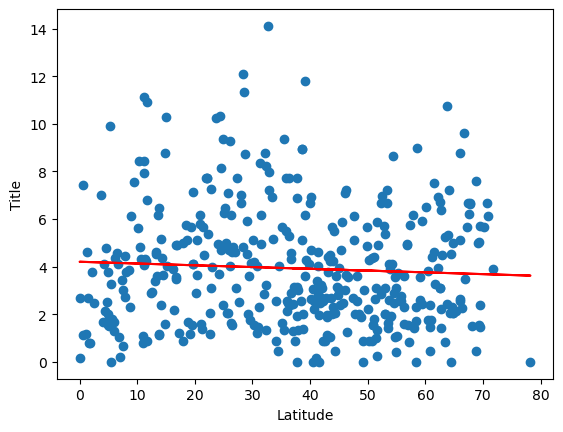

In [25]:
# Northern Hemisphere
x_values = north_hemi_df ["Lat"]
y_values = north_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed')

The r-squared is: -0.13395692107067347


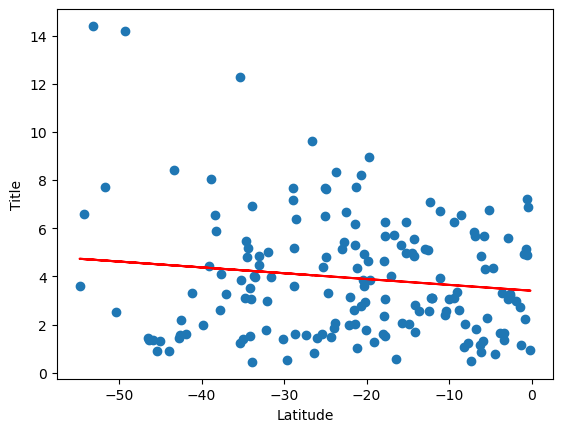

In [26]:
# Southern Hemisphere
x_values = south_hemi_df ["Lat"]
y_values = south_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE